In [3]:
import os
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely import wkt
# from pygmo import hypervolume
# import pygmo as pg
# from pathlib2 import Path
import geopandas as gpd
# from scipy.optimize import curve_fit

In [4]:
def pre_read():
#     如果报错记得检查文件路径
    print('pre read')
    with open("./DATA/real_life_case_network/prepared/upstream_set.pkl", "rb") as tf:
        upstream_set = pickle.load(tf)
    tf.close()
    with open("./DATA/real_life_case_network/prepared/upstream_arr.pkl", "rb") as tf:
        upstream_arr = pickle.load(tf)
    tf.close()
    with open("./DATA/real_life_case_network/prepared/upstream_links_set.pkl", "rb") as tf:
        upstream_links_set = pickle.load(tf)
    tf.close()

    fn = './DATA/real_life_case_network/prepared/pipe_TM_clean_relabel.pkl'
    relabeled_G = nx.read_gpickle(fn)

    mapping_file = open('./DATA/real_life_case_network/prepared/label_mapping.pkl',
                        'rb')  # 以二进制读模式（rb）打开pkl文件
    data = pickle.load(mapping_file)  # 读取存储的pickle文件
    pos_data = dict(zip(data.values(), data.keys()))

    return upstream_arr, upstream_set,upstream_links_set, relabeled_G, pos_data
upstream_arr, upstream_set,upstream_links_set, relabeled_G, pos_data = pre_read()

def solution_to_objective_values(solution):
    # extract objective values from solution
    objective_values = []
    objective_values.extend([individual[1:3] for individual in solution])
    objective_values = np.array(objective_values)
    return objective_values

def cal_norm_para(min_max_df):
    coverage_min=min_max_df['coverage'].min()
    coverage_max=min_max_df['coverage'].max()
    resolution_min=min_max_df['resolution'].min()
    resolution_max=min_max_df['resolution'].max()
    norm_params={'coverage':[coverage_min,coverage_max],
            'resolution':[resolution_min,resolution_max]}
    return norm_params

def normalize(values, norm_params, col):
    mini, maxi = norm_params[col]
    return (values - mini)/(maxi - mini)

ref_point=[1,1]

pre read


# synthetic case

In [ ]:
# read time.txt file,修改new_plans
sizes=[100,500,1000,1500,2000,2500,3000]
for size in sizes:
    max_sensor=int(size/10)
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_30//0//time.txt'
    f=open(path_new,'r')
    print(f.read())

#### when OG cannot generate solution

In [4]:
# new greedy result to get the min_max_df, network size from 1500-3000
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]
size=1500
max_sensor=int(size/10)
for new_plans in new_plans_all:
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)

    obj_new=solution_to_objective_values(result_new)
    obj_new_df=pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_new_df)

norm_params=cal_norm_para(min_max_df)
norm_params


<ipython-input-4-7a6c7545e462>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-4-7a6c7545e462>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-4-7a6c7545e462>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-4-7a6c7545e462>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-4-7a6c7545e462>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

{'coverage': [-1500.0, -150.0], 'resolution': [0.0, 3.6186168530098466]}

In [7]:
for new_plans in new_plans_all:
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)
    obj_new=solution_to_objective_values(result_new)
    obj_norm=obj_new.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj_new[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', hv)
    print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

new_plans: 5 hv: 0.14496039639724717
HV for new greedy with 5 new plans generated and network size of 1500 is 0.145.
new_plans: 10 hv: 0.24290778563718432
HV for new greedy with 10 new plans generated and network size of 1500 is 0.243.
new_plans: 15 hv: 0.2468964382636871
HV for new greedy with 15 new plans generated and network size of 1500 is 0.247.
new_plans: 20 hv: 0.25529269144509176
HV for new greedy with 20 new plans generated and network size of 1500 is 0.255.
new_plans: 25 hv: 0.26670018126477113
HV for new greedy with 25 new plans generated and network size of 1500 is 0.267.
new_plans: 30 hv: 0.2600714149373262
HV for new greedy with 30 new plans generated and network size of 1500 is 0.26.


#### when OG can generaete solution

In [182]:
# network size : 100, 500, 1000
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]
size=1000
max_sensor=int(size/10)
for new_plans in new_plans_all:   
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)

    obj_new=solution_to_objective_values(result_new)
    obj_new_df=pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_new_df)

path_original='.//TESTOUTPUT//synthetic_case//greedy_original//'+str(size)+'//0//'+'max_sensor_' + str(max_sensor) + '_Lmax_20'+'//0//solution.pkl'
with open(path_original, 'rb') as f:
    greedy_original = pickle.load(f)

n=len(greedy_original)
result_original=greedy_original[n-1]

obj_original=solution_to_objective_values(result_original)
obj_original_df=pd.DataFrame(obj_original, columns=['coverage', 'resolution'])
min_max_df=min_max_df.append(obj_original_df)

norm_params=cal_norm_para(min_max_df)
norm_params

<ipython-input-182-2e7195fbc5b2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-182-2e7195fbc5b2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-182-2e7195fbc5b2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-182-2e7195fbc5b2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_new_df)
<ipython-input-182-2e7195fbc5b2>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

{'coverage': [-1000.0, -100.0], 'resolution': [0.0, 3.593045742364111]}

In [183]:
for new_plans in new_plans_all:
    max_sensor=int(size/10)
    path_new='.//TESTOUTPUT//synthetic_case//greedy_new//' + str(size) + '//0//' + 'max_sensor_' + str(max_sensor) + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path_new, 'rb') as f:
        result_new = pickle.load(f)
    obj_new=solution_to_objective_values(result_new)
    obj_norm=obj_new.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj_new[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', hv)
    print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

obj_norm=obj_original.copy()  # obj should be array
for i in range(2):
    obj_norm[:,i]=normalize(obj_original[:,i], norm_params, ['coverage', 'resolution'][i])
hv=pg.hypervolume(obj_norm).compute(ref_point)
print('HV for original greedy with network size of {} is {}.'.format(size,round(hv,3)))

new_plans: 5 hv: 0.20508730520278268
HV for new greedy with 5 new plans generated and network size of 1000 is 0.205.
new_plans: 10 hv: 0.22143105002587943
HV for new greedy with 10 new plans generated and network size of 1000 is 0.221.
new_plans: 15 hv: 0.22303985992181358
HV for new greedy with 15 new plans generated and network size of 1000 is 0.223.
new_plans: 20 hv: 0.24273642929226807
HV for new greedy with 20 new plans generated and network size of 1000 is 0.243.
new_plans: 25 hv: 0.24824718373867094
HV for new greedy with 25 new plans generated and network size of 1000 is 0.248.
new_plans: 30 hv: 0.2519951460650752
HV for new greedy with 30 new plans generated and network size of 1000 is 0.252.
HV for original greedy with network size of 1000 is 0.296.


# real-world case

#### time and HV

In [31]:
# 时间
new_plans_all=[5,10,15,20,25,30]
for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//time.txt'
    f=open(path,'r')
    print(f.read())

27.58572220802307
64.55658888816833
116.71444535255432
172.19359970092773
261.4512119293213
309.93577122688293


In [14]:
# HV
min_max_df=pd.DataFrame(columns=['coverage','resolution'])
new_plans_all=[5,10,15,20,25,30]

for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path, 'rb') as f:
        result = pickle.load(f)

    obj=solution_to_objective_values(result)
    obj_df=pd.DataFrame(obj, columns=['coverage', 'resolution'])
    min_max_df=min_max_df.append(obj_df)

norm_params=cal_norm_para(min_max_df)
norm_params

<ipython-input-14-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-14-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-14-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-14-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  min_max_df=min_max_df.append(obj_df)
<ipython-input-14-7325410f3266>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

{'coverage': [-4212.0, -100.0], 'resolution': [0.0, 6.548031019096646]}

In [15]:
for new_plans in new_plans_all:
    path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100' + '_Lmax_20_new_plans_'+str(new_plans)+'//0//final_solution.pkl'
    with open(path, 'rb') as f:
        result = pickle.load(f)
    obj=solution_to_objective_values(result)
    obj_norm=obj.copy()  # obj should be array
    for i in range(2):
        obj_norm[:,i]=normalize(obj[:,i], norm_params, ['coverage', 'resolution'][i])
    hv=pg.hypervolume(obj_norm).compute(ref_point)
    print('new_plans:', new_plans, 'hv:', round(hv,3))
    # print('HV for new greedy with {} new plans generated and network size of {} is {}.'.format(new_plans, size,round(hv,3)))

new_plans: 5 hv: 0.189
new_plans: 10 hv: 0.24
new_plans: 15 hv: 0.273
new_plans: 20 hv: 0.26
new_plans: 25 hv: 0.281
new_plans: 30 hv: 0.273


#### pareto front

In [5]:
# 读取数据
path='.//TESTOUTPUT//real_case//greedy_new//max_sensor_100_Lmax_20_new_plans_25//0//final_solution.pkl'
with open(path,'rb') as f:
    data=pickle.load(f)

In [6]:
obj=solution_to_objective_values(data)
obj_df=pd.DataFrame(obj,columns=['coverage','resolution'])

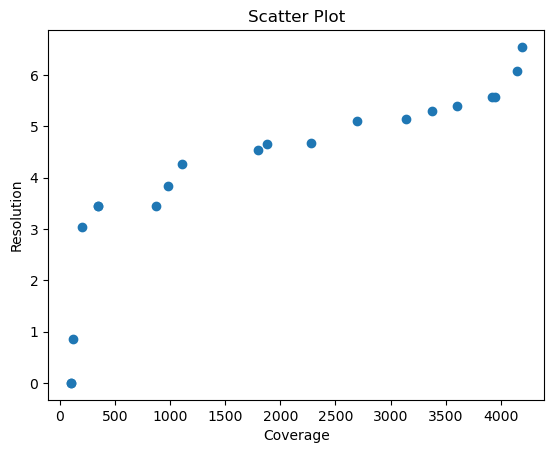

In [59]:
# cost-effective plot, x-axis is coverage, y-axis is resolution
plt.scatter(-obj_df['coverage'], obj_df['resolution'])
plt.xlabel('Coverage')
plt.ylabel('Resolution')
plt.title('Scatter Plot')
plt.show()

#### select one solution：coverage最大

In [7]:
coverage=int(obj_df['coverage'].min())

In [8]:
for ind in data:
    if ind[1]==coverage:
        sol_example=ind

In [64]:
sol_example

[100,
 -4187,
 6.548031019096646,
 [27,
  37,
  41,
  45,
  53,
  77,
  95,
  147,
  153,
  161,
  271,
  278,
  285,
  305,
  358,
  377,
  382,
  443,
  464,
  502,
  636,
  665,
  831,
  848,
  864,
  1033,
  1163,
  1164,
  1237,
  1320,
  1400,
  1401,
  1418,
  1451,
  1458,
  1511,
  1517,
  1529,
  1572,
  1639,
  1697,
  1946,
  2009,
  2010,
  2015,
  2052,
  2118,
  2120,
  2129,
  2130,
  2197,
  2294,
  2312,
  2344,
  2409,
  2440,
  2501,
  2525,
  2589,
  2622,
  2644,
  2646,
  2684,
  2694,
  2757,
  2813,
  2830,
  2936,
  2975,
  3087,
  3097,
  3156,
  3179,
  3214,
  3364,
  3370,
  3372,
  3389,
  3391,
  3419,
  3594,
  3661,
  3681,
  3710,
  3719,
  3766,
  3844,
  3917,
  3918,
  3934,
  3971,
  3986,
  4004,
  4047,
  4146,
  4229,
  4236,
  4299,
  4321,
  4368]]

In [9]:
# 提取安置sensor的manhole
# 所有manhole的node
manhole=list(range(0, len(upstream_set)))
# 所有manhole标记都为0
mark=[0]*len(upstream_set)

# 提取出此solution中放置了sensor的manhole
sensor=sol_example[3]
# 对于被放置sensor的manhole，标记变为1
for node in sensor:
    mark[node]=1

# 将node与其标记连起来，形成一个dictionary
sensor_dictionary =  dict(zip(manhole, mark))

In [10]:
# 提取被cover的manhole，记录每个node被cover的次数
covered_node=[]
covered_times=[0]*len(upstream_set)
for node in sensor:
    covered_set=upstream_set[node]
    for j in covered_set:
        if j in covered_node:
            covered_times[j]+=1
        else:
            covered_times[j]=1
            covered_node.append(j)
# 将node与它被cover的次数连起来，形成一个dictionary
covered_node_dictionary =  dict(zip(manhole, covered_times))

In [11]:
# 给每个node加上是否被cover、被cover的次数、以及坐标
nx.set_node_attributes(relabeled_G,sensor_dictionary, "whether-selected")
nx.set_node_attributes(relabeled_G,covered_node_dictionary,'covered_times')
nx.set_node_attributes(relabeled_G,pos_data, "coordinate")

In [12]:
# 将node、选中次数、经纬度分别读取，成为list
node=[]
whether_covered=[]
covered_times=[]
coordinate=[]
for i in range(4394):
    node.append(i)
    whether_covered.append(relabeled_G.nodes[i]['whether-selected'])
    covered_times.append(relabeled_G.nodes[i]['covered_times'])
    coordinate.append(relabeled_G.nodes[i]['coordinate'])
    #print(relabeled_G.nodes[i])

# list转化为dataframe
node=pd.DataFrame(node,columns=['node'])
whether_covered=pd.DataFrame(whether_covered,columns=['whether_selected'])
covered_times=pd.DataFrame(covered_times,columns=['covered_times'])
coordinate=pd.DataFrame(coordinate,columns=['lon','lat'])

# 合并dataframe
final=pd.concat([node,whether_covered,covered_times,coordinate],axis=1)

In [13]:
gdf = gpd.GeoDataFrame(
    final, geometry=gpd.points_from_xy(final.lon,final.lat))
gdf.set_crs('epsg:2326')
gdf.to_file('./post-analysis-result/example-viz-data/node-max-coverage.shp')

C:\Users\user\AppData\Local\Temp\ipykernel_11824\1296078080.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./post-analysis-result/example-viz-data/node-max-coverage.shp')


In [14]:
# 提取被cover的edge以及每条edge被cover的次数
covered_edge={}
for node in sensor:
    covered_link_set=upstream_links_set[node] # 提取sensor上游的link
    for j in covered_link_set:  # 对cover的link遍历
        if j in covered_edge.keys():   # 已经存在，value+1
            covered_edge[j]+=1
        else:  # 不存在，加入且value=1
            covered_edge[j]=1

# 将边被cover的次数赋给每个edge
nx.set_edge_attributes(relabeled_G,covered_edge,'covered_times')

# 转化为dataframe
test=nx.to_pandas_edgelist(relabeled_G)
# 将没有被cover到的edge对应的covered_times设置为0
test=test.fillna(0)

In [15]:
# 设置geometry
test['geom'] = test['Wkt'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(test, geometry='geom')
# 无关的列直接去掉
gdf=gdf[['source','target','covered_times','geom']]
# 设置坐标
gdf=gdf.set_crs('epsg:2326')
gdf.to_file('./post-analysis-result/example-viz-data/edge-max-coverage.shp')

C:\Users\user\AppData\Local\Temp\ipykernel_11824\4083976260.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('./post-analysis-result/example-viz-data/edge-max-coverage.shp')


### not used

In [ ]:

def HV_comparison(obj_new, obj_original):
    obj_new_df = pd.DataFrame(obj_new, columns=['coverage', 'resolution'])
    obj_original_df = pd.DataFrame(obj_original, columns=['coverage', 'resolution'])

    def cal_norm_para(obj_new_df, obj_original_df):
        min_max_df=pd.concat([obj_new_df, obj_original_df], ignore_index=True)
        coverage_min=min_max_df['coverage'].min()
        coverage_max=min_max_df['coverage'].max()
        resolution_min=min_max_df['resolution'].min()
        resolution_max=min_max_df['resolution'].max()
        norm_params={'coverage':[coverage_min,coverage_max],
               'resolution':[resolution_min,resolution_max]}
        return norm_params

    def normalize(values, norm_params, col):
        mini, maxi = norm_params[col]
        return (values - mini)/(maxi - mini)

    norm_params=cal_norm_para(obj_new_df, obj_original_df)

    def cal_HV(obj):
        ref_point=[1,1]
        obj_norm=obj.copy()  # obj should be array
        for i in range(2):
            obj_norm[:,i]=normalize(obj[:,i], norm_params, ['coverage', 'resolution'][i])
        hv=pg.hypervolume(obj_norm).compute(ref_point)
        return hv
    
    hv_new=cal_HV(obj_new)
    hv_original=cal_HV(obj_original)
    print('hv_new:', hv_new)
    print('hv_original:', hv_original)

    return hv_new, hv_original
